### Importing the Libraries

In [1]:
import numpy as np  # For using n-d array mathematical operations
import pandas as pd # For open csv files and create dataframe
import matplotlib.pyplot as plt # For plotting graphs

### Reading CSV Files and Checking the content in it

In [2]:
# Opening csv files
dataset = pd.read_csv('startup_funding.csv', skipinitialspace = True, encoding = 'utf-8')
df = dataset.copy() # Copying the dataset dataframe in df in case anything goes wrong, we can start again
df.head(10) # Showing first 10 rows in df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000",NaN


### Solution for given problem
To find top 5 industry with maximum amount of funding, we need to IndustryVertical and AmountInUSD column

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


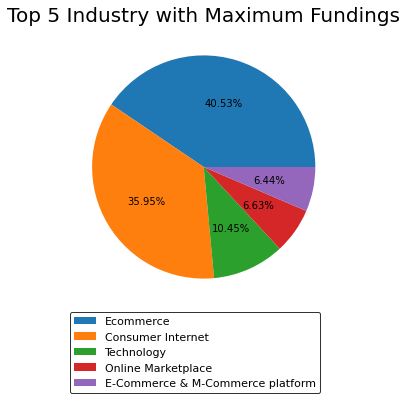

In [23]:
# Replacing incorrect values in IndustryVertical column with correct values
df.IndustryVertical.replace('eCommerce', 'Ecommerce', inplace = True)
df.IndustryVertical.replace('ECommerce', 'Ecommerce', inplace = True)
df.IndustryVertical.replace('ecommerce', 'Ecommerce', inplace = True)
df.IndustryVertical.replace(np.nan, '', inplace = True)
# Replacing nan values in AmountInUSD column with correct value
df.AmountInUSD.replace(np.nan, '0', inplace = True)

industryVertical = df.IndustryVertical # Fetching all industry types from IndustryVertical column
amountInUSD = df.AmountInUSD # Fetching all amount for each industry from AmountInUSD column

amountPerIndustry = {} # Creating dictionary, industry as key and values as amount
for index in range(len(amountInUSD)):
    industry = industryVertical[index]
    amount = int(str(amountInUSD[index]).replace(',',''))
    if industry != '':
        amountPerIndustry[industry] = amountPerIndustry.get(industry,0)+amount

industry = list(amountPerIndustry.keys()) # Fetching each industry from amountPerIndustry
amount = list(amountPerIndustry.values()) # Fetching total amount for each industry from amountPerIndustry

# zip function in python converts multiple 1d array into single nd array
# eg, if A = [1,2,3] B = [4,5,6], zip(A,B) = [(1,4),(2,5),(3,6)]
amountPerIndustry = list(zip(industry,amount))
# Sorting the 2D array into the descending order as per amount
amountPerIndustry.sort(reverse = True, key = lambda x:x[1])

amountPerIndustry = np.array(amountPerIndustry) # Converting array into nd numpy array
industry = amountPerIndustry[:,0] # Fetching all the industry from amountPerIndustry
# Fetching all the amount for each industry from amountPerIndustry
amount = np.array(amountPerIndustry[:,1], dtype = int) 
totalamount = np.sum(amount[:5]) # Calculating sum of top 5 fundings

# Printing top 5 industry with maximum fundings
for index in range(5):
    perc = amount[index]/totalamount*100
    print(industry[index], '{:.2f}'.format(perc))

# Plotting the Pie
plt.figure(figsize = (5,6))
plt.pie(amount[:5], autopct = '%.2f%%')
plt.legend(labels = industry[:5], loc = 'upper left', bbox_to_anchor = (0,0), edgecolor = 'black', fontsize = 11)
plt.title('Top 5 Industry with Maximum Fundings', fontsize = 20)
plt.show()